In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [59]:
df=pd.read_csv('MagicBricks.csv')

In [60]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [61]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [62]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


1. count null values
2. replacing the null values ( categorical ,  numrical )

In [64]:
df.isnull().any()

Area           False
BHK            False
Bathroom        True
Furnishing      True
Locality       False
Parking         True
Price          False
Status         False
Transaction    False
Type            True
Per_Sqft        True
dtype: bool

In [65]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [66]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [67]:
df.Parking.value_counts()

1.0      796
2.0      341
3.0       54
4.0       16
39.0       7
5.0        7
114.0      3
10.0       1
9.0        1
Name: Parking, dtype: int64

In [68]:
df1 = df[df.Parking.isnull()]
df1

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
30,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN
90,900.0,1,1.0,Semi-Furnished,Lajpat Nagar 3,NaN,8900000,Ready_to_move,Resale,Builder_Floor,NaN
120,1500.0,1,NaN,Unfurnished,Lajpat Nagar 2,NaN,13500000,Ready_to_move,Resale,Apartment,NaN
269,2799.0,4,4.0,Semi-Furnished,"Kailash Colony, Greater Kailash",NaN,65000000,Ready_to_move,New_Property,Builder_Floor,NaN
299,700.0,2,2.0,Unfurnished,"Ram Nagar, Shahdara",NaN,4600000,Ready_to_move,New_Property,Builder_Floor,NaN
300,750.0,2,2.0,Semi-Furnished,"Jyoti Nagar West, Shahdara",NaN,9200000,Ready_to_move,Resale,Builder_Floor,NaN
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0


In [69]:
df.Parking.fillna(0,inplace=True)
df.Parking.isnull().sum()

0

In [70]:
df.isnull().any()

Area           False
BHK            False
Bathroom        True
Furnishing      True
Locality       False
Parking        False
Price          False
Status         False
Transaction    False
Type            True
Per_Sqft        True
dtype: bool

In [71]:
df.drop('Parking',axis=1,inplace=True)

In [72]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Price', 'Status',
       'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [73]:
df['Bathroom'].isnull().sum()

2

In [74]:
df['Bathroom'].value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

In [75]:
df.Bathroom.fillna(2.0,inplace=True)

In [76]:
df['Bathroom'].value_counts()

2.0    553
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

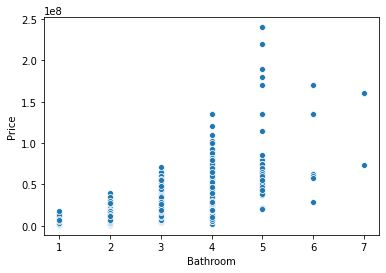

In [77]:
sns.scatterplot(x=df['Bathroom'],y=df['Price'],data=df)

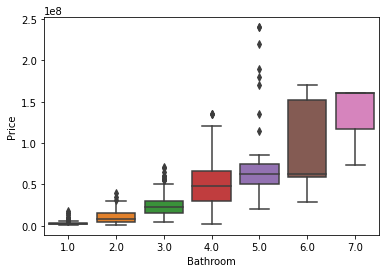

In [78]:
sns.boxplot(x=df['Bathroom'],y=df['Price'],data=df)

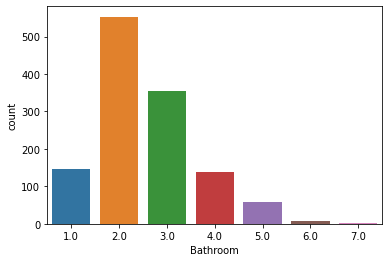

In [79]:
sns.countplot(df['Bathroom'])

In [80]:
df.drop('Locality',axis=1,inplace=True)

In [81]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Price', 'Status',
       'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [82]:
df.drop('Per_Sqft',axis=1,inplace=True)

In [83]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Price', 'Status',
       'Transaction', 'Type'],
      dtype='object')

In [84]:
df['Furnishing'].isnull().sum()

5

In [85]:
df['Furnishing'].value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

In [86]:
df.Furnishing.fillna('Semi-Furnished',inplace=True)

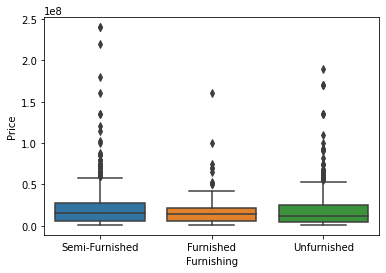

In [87]:
sns.boxplot(x=df['Furnishing'],y=df['Price'],data=df)

In [88]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Price', 'Status',
       'Transaction', 'Type'],
      dtype='object')

In [89]:
df.isnull().any()

Area           False
BHK            False
Bathroom       False
Furnishing     False
Price          False
Status         False
Transaction    False
Type            True
dtype: bool

In [90]:
df['Type'].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

In [91]:
df['Type'].replace(np.nan,'Apartment',inplace=True)


In [92]:
df.corr()['Price']

Area        0.580836
BHK         0.571523
Bathroom    0.728148
Price       1.000000
Name: Price, dtype: float64

Now we are creating our model for prediction of future target value.

In [93]:
x=df['Area'].values.reshape(-1,1)
y=df['Price'].values.reshape(-1,1)
lr=LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.3373701663901676

In [94]:
x=df['BHK'].values.reshape(-1,1)
y=df['Price'].values.reshape(-1,1)
lr=LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.32663838098835596

In [95]:
df = pd.get_dummies(df)

In [96]:
df.head()

,Area,BHK,Bathroom,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,800.0,3,2.0,6500000,0,1,0,0,1,1,0,0,1
1,750.0,2,2.0,5000000,0,1,0,0,1,1,0,1,0
2,950.0,2,2.0,15500000,1,0,0,0,1,0,1,1,0
3,600.0,2,2.0,4200000,0,1,0,0,1,0,1,0,1
4,650.0,2,2.0,6200000,0,1,0,0,1,1,0,0,1


In [97]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Price', 'Furnishing_Furnished',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished',
       'Status_Almost_ready', 'Status_Ready_to_move',
       'Transaction_New_Property', 'Transaction_Resale', 'Type_Apartment',
       'Type_Builder_Floor'],
      dtype='object')

In [98]:
y=df['Price']
features=['Area', 'BHK', 'Bathroom',  'Furnishing_Furnished',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished',
       'Status_Almost_ready', 'Status_Ready_to_move',
       'Transaction_New_Property', 'Transaction_Resale', 'Type_Apartment',
       'Type_Builder_Floor']
x=df[features]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
x_train.shape

(1007, 12)

In [99]:
x_test.shape

(252, 12)

In [100]:
y_train.shape

(1007,)

In [101]:
from sklearn.linear_model import Ridge
pr=PolynomialFeatures(degree=1)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
r=Ridge(alpha=0.1)
r.fit(x_train_pr,y_train)
r.score(x_test_pr,y_test)

0.6232977897210892

In [102]:
y_pred=r.predict(x_test_pr)

In [103]:
from sklearn.metrics import mean_squared_error as mse
rmse=np.sqrt(mse(y_test,y_pred))
print('Root mean squared error : {:.4f}'.format(rmse))

Root mean squared error : 15998286.0758


In [104]:
r=Ridge(0.1)
r.fit(x_train,y_train)
print(r.score(x_train,y_train))
print(r.score(x_test,y_test))

0.5800664989101327
0.6232977897210892


In [105]:
y_pred=r.predict(x_test)

In [106]:
from sklearn.metrics import mean_squared_error as mse
rmse=np.sqrt(mse(y_test,y_pred))
print('Root mean squared error : {:.4f}'.format(rmse))

Root mean squared error : 15998286.0758


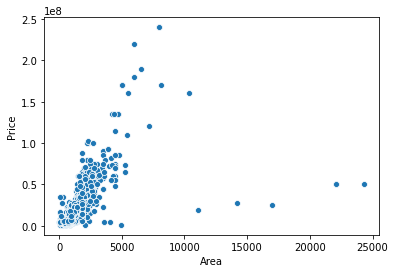

In [107]:
sns.scatterplot(x=df.Area,y=df.Price,data=df)

In [108]:
p=np.array(df[df['Area']>5000].index)

In [109]:
df.drop(p,inplace=True)

In [110]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Price', 'Furnishing_Furnished',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished',
       'Status_Almost_ready', 'Status_Ready_to_move',
       'Transaction_New_Property', 'Transaction_Resale', 'Type_Apartment',
       'Type_Builder_Floor'],
      dtype='object')

In [111]:
features=['Area', 'BHK', 'Bathroom',  'Furnishing_Furnished',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished',
       'Status_Almost_ready', 'Status_Ready_to_move',
       'Transaction_New_Property', 'Transaction_Resale', 'Type_Apartment',
       'Type_Builder_Floor']
y=df['Price']
x=df[features]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)
r=Ridge(0.1)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
root_sq_error=np.sqrt(mse(y_test,y_pred))

In [112]:
root_sq_error

10903995.507808395